In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("data_cleaned.csv")
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [3]:
X = df.drop("Survived", axis = 1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=10)
print("X train and test sizes: {}, {}".format(X_train.shape, X_test.shape))
print("y train and test sizes: {}, {}".format(y_train.shape, y_test.shape))

X train and test sizes: (668, 24), (223, 24)
y train and test sizes: (668,), (223,)


In [16]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(max_depth = 3, random_state=42, min_samples_split=11, min_samples_leaf=2, max_leaf_nodes=20)
tree1.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, max_leaf_nodes=20, min_samples_leaf=2,
                       min_samples_split=11, random_state=42)

In [17]:
def score(model, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test):
    print("train_score: ",model.score(X_train, y_train),end="\n")
    print("test_score: ",model.score(X_test, y_test))
print("test_score: ",tree1.score(X_test, y_test))

test_score:  0.8295964125560538


In [18]:
score(tree1)

train_score:  0.8083832335329342
test_score:  0.8295964125560538


In [19]:
    # model.score(X_train, y_train)
    # model.score(X_test, y_test)

In [22]:
train_acc = []
test_acc = []
for depth in range(1,10):
    tree = DecisionTreeClassifier(random_state=10, max_depth=depth, min_samples_leaf=2, min_samples_split=12)
    tree.fit(X_train, y_train)
    train_acc.append(tree.score(X_train, y_train))
    test_acc.append(tree.score(X_test, y_test))
    
df_depth = pd.DataFrame({"max_depth":range(1,10), "train_accuracy": train_acc, "test_accuracy":test_acc})

df_depth

,max_depth,train_accuracy,test_accuracy
0,1,0.773952,0.825112
1,2,0.776946,0.816143
2,3,0.808383,0.829596
3,4,0.830838,0.811659
4,5,0.845808,0.816143
5,6,0.854790,0.811659
6,7,0.863772,0.825112
7,8,0.866766,0.829596
8,9,0.869760,0.829596


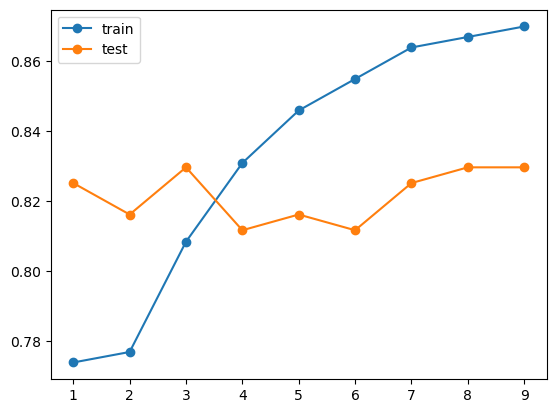

In [23]:
import matplotlib.pyplot as plt

plt.plot(df_depth["max_depth"],df_depth["train_accuracy"],  marker = "o", label  = "train")
plt.plot(df_depth["max_depth"],df_depth["test_accuracy"], marker = "o",label = "test")
plt.legend()

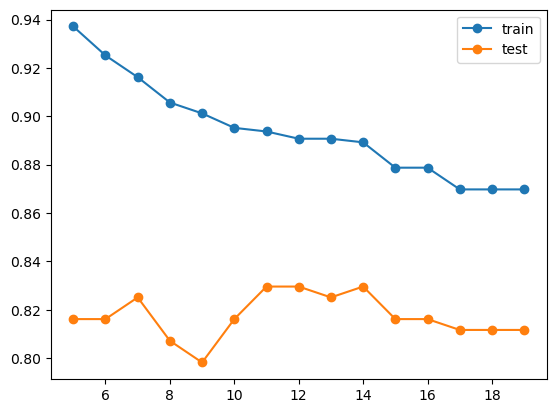

In [15]:
train_acc1 = []
test_acc1 = []
for n in range(5,20):
    tree = DecisionTreeClassifier(random_state=10, min_samples_split=n)
    tree.fit(X_train, y_train)
    train_acc1.append(tree.score(X_train, y_train))
    test_acc1.append(tree.score(X_test, y_test))
    
df_depth = pd.DataFrame({"min_sample_split":range(5,20), "train_accuracy": train_acc1, "test_accuracy":test_acc1})

plt.plot(df_depth["min_sample_split"],df_depth["train_accuracy"],  marker = "o", label  = "train")
plt.plot(df_depth["min_sample_split"],df_depth["test_accuracy"], marker = "o",label = "test")
plt.legend()

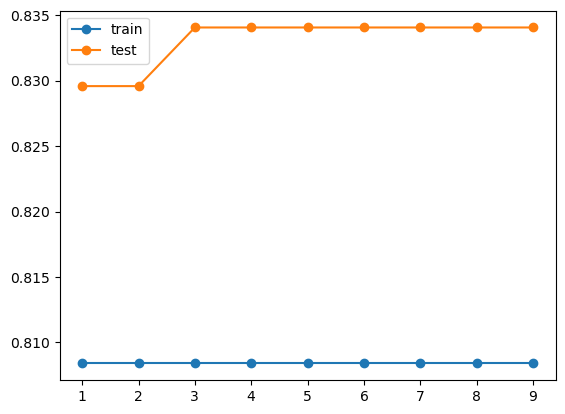

In [21]:
train_acc2 = []
test_acc2 = []
for n in range(1,10):
    tree = DecisionTreeClassifier(random_state=10, min_samples_split=12, max_depth=3,min_samples_leaf=n)
    tree.fit(X_train, y_train)
    train_acc2.append(tree.score(X_train, y_train))
    test_acc2.append(tree.score(X_test, y_test))
    
df_depth = pd.DataFrame({"min_sample_leaf":range(1,10), "train_accuracy": train_acc2, "test_accuracy":test_acc2})

plt.plot(df_depth["min_sample_leaf"],df_depth["train_accuracy"],  marker = "o", label  = "train")
plt.plot(df_depth["min_sample_leaf"],df_depth["test_accuracy"], marker = "o",label = "test")
plt.legend()

In [10]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [6]:

print("rf score: ", rf.score(X_test,y_test))

rf score:  0.7802690582959642


In [7]:
# !pip install xgboost

In [11]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 42, n_estimators = 100, n_jobs = -1,max_depth = 5)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [12]:
print("XGB score: ", xgb.score(X_test, y_test))

XGB score:  0.7757847533632287
